In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
temp_yer=pd.read_csv("D:/Gidromet/temperatura_base/base/yer_temperature.txt",header=None,encoding='latin-1',sep="\t")
temp_yer.columns=['id','date','temp_yer']
temp_yer['date']=pd.to_datetime(temp_yer['date'], format="%d.%m.%Y %H:%M")
temp_yer['id'] = temp_yer['id'].astype(str)

C:\Users\User\AppData\Local\Temp\ipykernel_2776\1028778629.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_yer=pd.read_csv("D:/Gidromet/temperatura_base/base/yer_temperature.txt",header=None,encoding='latin-1',sep="\t")


In [3]:
temp_nasa=pd.read_csv("D:/Gidromet/temperatura_base/base/NASA_temperature.txt",header=None,encoding='latin-1',sep="\t")
temp_nasa.columns=['id','date','temp_nasa']
temp_nasa['date']=pd.to_datetime(temp_nasa['date'])
temp_nasa=temp_nasa[temp_nasa['temp_nasa']>=-50]
temp_nasa['id'] = temp_nasa['id'].astype(str)

C:\Users\User\AppData\Local\Temp\ipykernel_2776\1298496597.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_nasa=pd.read_csv("D:/Gidromet/temperatura_base/base/NASA_temperature.txt",header=None,encoding='latin-1',sep="\t")
C:\Users\User\AppData\Local\Temp\ipykernel_2776\1298496597.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_nasa['id'] = temp_nasa['id'].astype(str)


In [4]:
temp_era5=pd.read_csv("D:/Gidromet/temperatura_base/base/ERA5_temperature.txt",header=None,encoding='latin-1',sep="\t")
temp_era5.columns=['id','date','temp_era5']
temp_era5['date'] = pd.to_datetime(temp_era5['date'])
temp_era5['id'] = temp_era5['id'].astype(str)

C:\Users\User\AppData\Local\Temp\ipykernel_2776\2190944096.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_era5=pd.read_csv("D:/Gidromet/temperatura_base/base/ERA5_temperature.txt",header=None,encoding='latin-1',sep="\t")


In [14]:
temp_yer.shape

(3241266, 4)

In [15]:
temp_nasa.shape

(12458616, 3)

In [58]:
filename = 'D:/Gidromet/temperatura_base/Meteostansiyalar.xlsx'
save_path = "d:/Gidromet/temperatura_base/soatlik/base3/"
excel_data = pd.read_excel(filename)
df = pd.DataFrame(excel_data)
print('sikl boshlandi')
for i, height in zip(df['WMO_ID'],df['Dengiz satxidan balandligi (m)']):
#     print(height)
#     print(i)
    if height>1000:
        if (temp_yer['id']==str(i)).any():
        #id larni sik ichida aylantirish
#         if i in temp_yer['id'].values:
            # shu id ga mos qismini ajratib olish
            temp1=temp_yer[temp_yer['id']==str(i)]
            # date ustunidan soat qismini ajratib olish
            temp1['soat']=temp1['date'].dt.to_period('H')
            # nasa uchun ham shu ishlarni bajarish
            temp2=temp_nasa[temp_nasa['id']==str(i)]
            temp2['soat']=temp2['date'].dt.to_period('H')
            # ikkita dataframeni soat bo'yicha mso qiymatlarini qo'shish
            temp_new = pd.merge(temp1, temp2, on=['id','soat'], how='inner')
            # kerakli ustunlarni ajratib olish
            temp_new1=temp_new[['id','date_x','temp_yer','temp_nasa']]
            print(temp_new1)

        else:
            print('sikl2')
            temp1=temp_yer[temp_yer['id']==str(i)]
            print(i)
            # date ustunidan soat qismini ajratib olish
            temp1['soat']=temp1['date'].dt.to_period('H')
            # nasa uchun  ham shu ishlarni bajarish
            temp2=temp_nasa[temp_nasa['id']==str(i)]
            temp2['soat']=temp2['date'].dt.to_period('H')
            # ikkita dataframeni soat bo'yicha mso qiymatlarini qo'shish
            temp_new = pd.merge(temp1, temp2, on=['id','soat'], how='inner')
            # kerakli ustunklarni ajratib olish
            temp_new1=temp_new[['id','date_x','temp_yer','temp_nasa']]
            print(temp_new1)
        temp_new1.to_csv(save_path +str(i)+".txt", header=False)
print('sikl tugadi')

sikl boshlandi


C:\Users\User\AppData\Local\Temp\ipykernel_2776\1505040575.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['soat']=temp1['date'].dt.to_period('H')
C:\Users\User\AppData\Local\Temp\ipykernel_2776\1505040575.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['soat']=temp2['date'].dt.to_period('H')


          id              date_x  temp_yer  temp_nasa
0      38711 2022-12-20 20:00:00       0.1      -2.06
1      38711 2022-12-20 17:00:00       5.2      -1.90
2      38711 2022-12-20 14:00:00       7.2       3.06
3      38711 2022-12-20 11:00:00       6.8       2.95
4      38711 2022-12-20 08:00:00       0.3      -1.78
...      ...                 ...       ...        ...
39584  38711 2005-02-02 08:00:00       4.7      -2.03
39585  38711 2005-02-02 02:00:00       6.6      -2.26
39586  38711 2005-02-01 20:00:00       4.4      -1.45
39587  38711 2005-02-01 14:00:00       9.3       1.28
39588  38711 2005-02-01 08:00:00       3.9      -4.63

[39589 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_2776\1505040575.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['soat']=temp1['date'].dt.to_period('H')
C:\Users\User\AppData\Local\Temp\ipykernel_2776\1505040575.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['soat']=temp2['date'].dt.to_period('H')


          id              date_x  temp_yer  temp_nasa
0      38818 2022-12-20 20:00:00       1.0       3.34
1      38818 2022-12-20 17:00:00       3.8       4.17
2      38818 2022-12-20 14:00:00       5.6       8.62
3      38818 2022-12-20 11:00:00       4.4       8.51
4      38818 2022-12-20 08:00:00       1.8       3.23
...      ...                 ...       ...        ...
42754  38818 2005-02-01 23:00:00       0.4       5.62
42755  38818 2005-02-01 20:00:00      -1.6       5.74
42756  38818 2005-02-01 17:00:00      -2.2       5.71
42757  38818 2005-02-01 14:00:00       1.4       7.64
42758  38818 2005-02-01 11:00:00       0.1      10.40

[42759 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_2776\1505040575.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['soat']=temp1['date'].dt.to_period('H')
C:\Users\User\AppData\Local\Temp\ipykernel_2776\1505040575.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['soat']=temp2['date'].dt.to_period('H')


          id              date_x  temp_yer  temp_nasa
0      38816 2022-12-20 20:00:00      -2.7      -1.36
1      38816 2022-12-20 17:00:00       0.6      -0.61
2      38816 2022-12-20 14:00:00       2.6       4.16
3      38816 2022-12-20 11:00:00       2.3       5.40
4      38816 2022-12-20 08:00:00      -2.1       0.90
...      ...                 ...       ...        ...
42362  38816 2005-02-01 17:00:00       0.6      -0.82
42363  38816 2005-02-01 14:00:00      -1.0       1.67
42364  38816 2005-02-01 11:00:00      -1.2       2.10
42365  38816 2005-02-01 08:00:00      -3.4      -0.15
42366  38816 2005-02-01 05:00:00      -3.5      -3.81

[42367 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_2776\1505040575.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['soat']=temp1['date'].dt.to_period('H')
C:\Users\User\AppData\Local\Temp\ipykernel_2776\1505040575.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['soat']=temp2['date'].dt.to_period('H')


          id              date_x  temp_yer  temp_nasa
0      38827 2022-12-20 23:00:00       0.8       1.86
1      38827 2022-12-20 20:00:00       2.8       1.88
2      38827 2022-12-20 17:00:00       7.6       2.47
3      38827 2022-12-20 14:00:00       8.4       6.24
4      38827 2022-12-20 11:00:00       7.2       6.24
...      ...                 ...       ...        ...
34595  38827 2005-02-02 14:00:00       5.1       3.18
34596  38827 2005-02-02 08:00:00       4.3       2.50
34597  38827 2005-02-01 20:00:00       5.1       0.48
34598  38827 2005-02-01 14:00:00       5.7       5.46
34599  38827 2005-02-01 08:00:00       1.3       1.55

[34600 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_2776\1505040575.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['soat']=temp1['date'].dt.to_period('H')
C:\Users\User\AppData\Local\Temp\ipykernel_2776\1505040575.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['soat']=temp2['date'].dt.to_period('H')


          id              date_x  temp_yer  temp_nasa
0      38460 2022-12-20 23:00:00      -2.1      -1.32
1      38460 2022-12-20 20:00:00      -1.5      -0.79
2      38460 2022-12-20 17:00:00       0.7       0.06
3      38460 2022-12-20 14:00:00       3.9       4.58
4      38460 2022-12-20 11:00:00       4.1       4.24
...      ...                 ...       ...        ...
32267  38460 2005-02-02 14:00:00       0.2       1.47
32268  38460 2005-02-02 08:00:00      -2.0      -0.80
32269  38460 2005-02-01 20:00:00      -2.0      -1.91
32270  38460 2005-02-01 14:00:00      -2.3      -0.12
32271  38460 2005-02-01 08:00:00      -4.6      -2.49

[32272 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_2776\1505040575.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['soat']=temp1['date'].dt.to_period('H')
C:\Users\User\AppData\Local\Temp\ipykernel_2776\1505040575.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['soat']=temp2['date'].dt.to_period('H')


          id              date_x  temp_yer  temp_nasa
0      38467 2022-12-21 02:00:00      -2.6      -2.05
1      38467 2022-12-20 20:00:00      -3.0      -0.64
2      38467 2022-12-20 17:00:00      -1.2       0.43
3      38467 2022-12-20 14:00:00       4.2       4.56
4      38467 2022-12-20 11:00:00       2.2       3.98
...      ...                 ...       ...        ...
39095  38467 2005-02-02 08:00:00      -2.7      -0.78
39096  38467 2005-02-02 02:00:00      -3.2      -1.77
39097  38467 2005-02-01 20:00:00      -2.8      -1.64
39098  38467 2005-02-01 14:00:00      -3.2       1.00
39099  38467 2005-02-01 08:00:00      -6.0      -3.04

[39100 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_2776\1505040575.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['soat']=temp1['date'].dt.to_period('H')
C:\Users\User\AppData\Local\Temp\ipykernel_2776\1505040575.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['soat']=temp2['date'].dt.to_period('H')


          id              date_x  temp_yer  temp_nasa
0      38339 2022-12-20 20:00:00     -11.4     -10.28
1      38339 2022-12-20 17:00:00      -9.4      -7.56
2      38339 2022-12-20 14:00:00      -4.4      -2.28
3      38339 2022-12-20 11:00:00      -8.6      -4.07
4      38339 2022-12-20 08:00:00     -14.4      -9.60
...      ...                 ...       ...        ...
42463  38339 2005-02-01 17:00:00      -6.2      -8.61
42464  38339 2005-02-01 14:00:00      -5.4      -6.06
42465  38339 2005-02-01 11:00:00      -7.2      -7.40
42466  38339 2005-02-01 08:00:00      -9.8     -11.84
42467  38339 2005-02-01 05:00:00     -10.2     -12.76

[42468 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_2776\1505040575.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['soat']=temp1['date'].dt.to_period('H')
C:\Users\User\AppData\Local\Temp\ipykernel_2776\1505040575.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['soat']=temp2['date'].dt.to_period('H')


          id              date_x  temp_yer  temp_nasa
0      38462 2022-12-21 14:00:00      -1.7      -6.98
1      38462 2022-12-21 11:00:00      -1.8      -5.62
2      38462 2022-12-21 08:00:00      -2.2     -10.85
3      38462 2022-12-21 05:00:00      -3.1     -11.75
4      38462 2022-12-21 02:00:00      -4.9     -12.39
...      ...                 ...       ...        ...
51596  38462 2005-02-01 17:00:00      -2.1      -8.61
51597  38462 2005-02-01 14:00:00      -2.0      -6.06
51598  38462 2005-02-01 11:00:00      -2.3      -7.40
51599  38462 2005-02-01 08:00:00      -4.2     -11.84
51600  38462 2005-02-01 05:00:00      -4.6     -12.76

[51601 rows x 4 columns]
          id              date_x  temp_yer  temp_nasa
0      38706 2022-12-21 02:00:00      -2.4      -5.17
1      38706 2022-12-20 20:00:00       0.2      -3.06
2      38706 2022-12-20 17:00:00       1.3      -1.72
3      38706 2022-12-20 14:00:00       4.6       1.62
4      38706 2022-12-20 11:00:00       2.4       0.48
..

C:\Users\User\AppData\Local\Temp\ipykernel_2776\1505040575.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['soat']=temp1['date'].dt.to_period('H')
C:\Users\User\AppData\Local\Temp\ipykernel_2776\1505040575.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['soat']=temp2['date'].dt.to_period('H')


In [66]:
filename = 'D:/Gidromet/temperatura_base/Meteostansiyalar.xlsx'
save_path = "d:/Gidromet/temperatura_base/soatlik/base7/"
excel_data = pd.read_excel(filename)
df = pd.DataFrame(excel_data)
print('sikl boshlandi')
for i, height in zip(df['WMO_ID'],df['Dengiz satxidan balandligi (m)']):
#     print(height)
#     print(i)
    if height>1000:
        if (temp_yer['id']==str(i)).any():
        #id larni sik ichida aylantirish
#         if i in temp_yer['id'].values:
            # shu id ga mos qismini ajratib olish
            temp1=temp_yer[temp_yer['id']==str(i)]
            # date ustunidan soat qismini ajratib olish
            temp1['soat']=temp1['date'].dt.to_period('H')
            # nasa uchun ham shu ishlarni bajarish
            temp2=temp_era5[temp_era5['id']==str(i)]
            temp2['soat']=temp2['date'].dt.to_period('H')
            # ikkita dataframeni soat bo'yicha mso qiymatlarini qo'shish
            temp_new = pd.merge(temp1, temp2, on=['id','soat'], how='inner')
            # kerakli ustunlarni ajratib olish
            temp_new1=temp_new[['id','date_x','temp_yer','temp_era5']]
            print(temp_new1)

        else:
            print('sikl2')
            temp1=temp_yer[temp_yer['id']==str(i)]
            print(i)
            # date ustunidan soat qismini ajratib olish
            temp1['soat']=temp1['date'].dt.to_period('H')
            # nasa uchun  ham shu ishlarni bajarish
            temp2=temp_era5[temp_era5['id']==str(i)]
            temp2['soat']=temp2['date'].dt.to_period('H')
            # ikkita dataframeni soat bo'yicha mso qiymatlarini qo'shish
            temp_new = pd.merge(temp1, temp2, on=['id','soat'], how='inner')
            # kerakli ustunklarni ajratib olish
            temp_new1=temp_new[['id','date_x','temp_yer','temp_era5']]
            print(temp_new1)
        temp_new1.to_csv(save_path +str(i)+".txt", header=False)
print('sikl tugadi')

sikl boshlandi


C:\Users\User\AppData\Local\Temp\ipykernel_2776\2804631757.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['soat']=temp1['date'].dt.to_period('H')
C:\Users\User\AppData\Local\Temp\ipykernel_2776\2804631757.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['soat']=temp2['date'].dt.to_period('H')


          id              date_x  temp_yer  temp_era5
0      38711 2022-01-01 02:00:00       2.9       0.42
1      38711 2021-12-31 23:00:00       2.1      -1.19
2      38711 2021-12-31 17:00:00       5.3       2.15
3      38711 2021-12-31 14:00:00      10.8       0.57
4      38711 2021-12-31 11:00:00       6.6      -3.05
...      ...                 ...       ...        ...
36884  38711 2005-02-02 08:00:00       4.7       1.03
36885  38711 2005-02-02 02:00:00       6.6      -1.54
36886  38711 2005-02-01 20:00:00       4.4      -1.15
36887  38711 2005-02-01 14:00:00       9.3      -1.01
36888  38711 2005-02-01 08:00:00       3.9      -4.26

[36889 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_2776\2804631757.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['soat']=temp1['date'].dt.to_period('H')
C:\Users\User\AppData\Local\Temp\ipykernel_2776\2804631757.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['soat']=temp2['date'].dt.to_period('H')


          id              date_x  temp_yer  temp_era5
0      38818 2022-01-01 02:00:00       6.3       6.94
1      38818 2021-12-31 20:00:00       7.1       9.89
2      38818 2021-12-31 17:00:00       7.9      14.36
3      38818 2021-12-31 11:00:00       7.7      10.79
4      38818 2021-12-31 05:00:00       5.6       3.61
...      ...                 ...       ...        ...
40070  38818 2005-02-01 23:00:00       0.4      12.97
40071  38818 2005-02-01 20:00:00      -1.6      11.89
40072  38818 2005-02-01 17:00:00      -2.2      13.33
40073  38818 2005-02-01 14:00:00       1.4      14.55
40074  38818 2005-02-01 11:00:00       0.1      11.85

[40075 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_2776\2804631757.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['soat']=temp1['date'].dt.to_period('H')
C:\Users\User\AppData\Local\Temp\ipykernel_2776\2804631757.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['soat']=temp2['date'].dt.to_period('H')


          id              date_x  temp_yer  temp_era5
0      38816 2022-01-01 02:00:00       0.8       3.95
1      38816 2021-12-31 17:00:00       2.6       6.91
2      38816 2021-12-31 11:00:00       6.1       6.68
3      38816 2021-12-31 05:00:00       0.9       1.37
4      38816 2021-12-31 02:00:00       1.1       2.18
...      ...                 ...       ...        ...
39757  38816 2005-02-01 17:00:00       0.6       4.61
39758  38816 2005-02-01 14:00:00      -1.0       3.96
39759  38816 2005-02-01 11:00:00      -1.2       2.88
39760  38816 2005-02-01 08:00:00      -3.4       0.93
39761  38816 2005-02-01 05:00:00      -3.5       1.36

[39762 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_2776\2804631757.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['soat']=temp1['date'].dt.to_period('H')
C:\Users\User\AppData\Local\Temp\ipykernel_2776\2804631757.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['soat']=temp2['date'].dt.to_period('H')


          id              date_x  temp_yer  temp_era5
0      38827 2022-01-01 02:00:00       6.1       7.00
1      38827 2021-12-31 23:00:00       8.1       7.01
2      38827 2021-12-31 17:00:00      11.4      11.09
3      38827 2021-12-31 14:00:00      13.8      11.27
4      38827 2021-12-31 11:00:00      12.5       8.69
...      ...                 ...       ...        ...
31884  38827 2005-02-02 14:00:00       5.1       3.10
31885  38827 2005-02-02 08:00:00       4.3       4.87
31886  38827 2005-02-01 20:00:00       5.1       4.06
31887  38827 2005-02-01 14:00:00       5.7       4.48
31888  38827 2005-02-01 08:00:00       1.3       0.86

[31889 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_2776\2804631757.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['soat']=temp1['date'].dt.to_period('H')
C:\Users\User\AppData\Local\Temp\ipykernel_2776\2804631757.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['soat']=temp2['date'].dt.to_period('H')


          id              date_x  temp_yer  temp_era5
0      38460 2022-01-01 02:00:00       1.2      -0.66
1      38460 2021-12-31 23:00:00       1.3       0.31
2      38460 2021-12-31 17:00:00       2.2       3.06
3      38460 2021-12-31 14:00:00       5.3       4.45
4      38460 2021-12-31 11:00:00       5.5       2.42
...      ...                 ...       ...        ...
29701  38460 2005-02-02 14:00:00       0.2      -0.86
29702  38460 2005-02-02 08:00:00      -2.0      -0.42
29703  38460 2005-02-01 20:00:00      -2.0      -2.02
29704  38460 2005-02-01 14:00:00      -2.3      -1.29
29705  38460 2005-02-01 08:00:00      -4.6      -3.73

[29706 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_2776\2804631757.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['soat']=temp1['date'].dt.to_period('H')
C:\Users\User\AppData\Local\Temp\ipykernel_2776\2804631757.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['soat']=temp2['date'].dt.to_period('H')


          id              date_x  temp_yer  temp_era5
0      38467 2022-01-01 02:00:00      -1.2      -2.16
1      38467 2021-12-31 23:00:00      -1.3      -0.56
2      38467 2021-12-31 17:00:00      -0.2      -1.07
3      38467 2021-12-31 14:00:00       0.6      -0.09
4      38467 2021-12-31 11:00:00       0.2      -0.59
...      ...                 ...       ...        ...
36430  38467 2005-02-02 08:00:00      -2.7      -4.61
36431  38467 2005-02-02 02:00:00      -3.2      -4.82
36432  38467 2005-02-01 20:00:00      -2.8      -6.08
36433  38467 2005-02-01 14:00:00      -3.2      -5.01
36434  38467 2005-02-01 08:00:00      -6.0      -6.52

[36435 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_2776\2804631757.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['soat']=temp1['date'].dt.to_period('H')
C:\Users\User\AppData\Local\Temp\ipykernel_2776\2804631757.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['soat']=temp2['date'].dt.to_period('H')


          id              date_x  temp_yer  temp_era5
0      38339 2022-01-01 02:00:00      -5.2     -10.57
1      38339 2021-12-31 17:00:00      -2.7     -11.10
2      38339 2021-12-31 14:00:00      -1.3     -11.88
3      38339 2021-12-31 11:00:00      -4.0     -12.69
4      38339 2021-12-31 05:00:00      -9.0     -11.71
...      ...                 ...       ...        ...
39774  38339 2005-02-01 17:00:00      -6.2     -12.99
39775  38339 2005-02-01 14:00:00      -5.4     -12.94
39776  38339 2005-02-01 11:00:00      -7.2     -14.99
39777  38339 2005-02-01 08:00:00      -9.8     -15.61
39778  38339 2005-02-01 05:00:00     -10.2     -16.88

[39779 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_2776\2804631757.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['soat']=temp1['date'].dt.to_period('H')
C:\Users\User\AppData\Local\Temp\ipykernel_2776\2804631757.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['soat']=temp2['date'].dt.to_period('H')


          id              date_x  temp_yer  temp_era5
0      38462 2022-01-01 02:00:00       0.5      -7.50
1      38462 2021-12-31 23:00:00       0.7      -6.71
2      38462 2021-12-31 20:00:00       3.5      -7.36
3      38462 2021-12-31 17:00:00       4.7      -7.08
4      38462 2021-12-31 14:00:00       5.8      -8.72
...      ...                 ...       ...        ...
48824  38462 2005-02-01 17:00:00      -2.1      -8.01
48825  38462 2005-02-01 14:00:00      -2.0      -9.27
48826  38462 2005-02-01 11:00:00      -2.3     -11.49
48827  38462 2005-02-01 08:00:00      -4.2     -11.88
48828  38462 2005-02-01 05:00:00      -4.6     -12.29

[48829 rows x 4 columns]
          id              date_x  temp_yer  temp_era5
0      38706 2022-01-01 02:00:00      -1.3      -3.77
1      38706 2021-12-31 23:00:00      -1.2      -3.50
2      38706 2021-12-31 17:00:00       2.4      -1.42
3      38706 2021-12-31 14:00:00       5.1      -0.32
4      38706 2021-12-31 11:00:00       4.6      -2.25
..

C:\Users\User\AppData\Local\Temp\ipykernel_2776\2804631757.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['soat']=temp1['date'].dt.to_period('H')
C:\Users\User\AppData\Local\Temp\ipykernel_2776\2804631757.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['soat']=temp2['date'].dt.to_period('H')


In [67]:
import os
input_dir = 'd:/Gidromet/temperatura_base/soatlik/base7/'
output_file = 'd:/Gidromet/temperatura_base/soatlik/yer_era5_ot1000.txt'
filenames = os.listdir(input_dir)
with open(output_file, 'a') as outfile:
    n = 0
    for filename in filenames:
        base_filename, extension = os.path.splitext(filename)
        with open(os.path.join(input_dir, filename), 'r') as infile:
            outfile.write(infile.read())
        n += 1

In [7]:
temp_yer['soat']=temp_yer['date'].dt.to_period('H')
temp_era5['soat']=temp_era5['date'].dt.to_period('H')
temp_new = pd.merge(temp_yer, temp_era5, on=['id','soat'], how='inner')
temp_new2=temp_new[['id','date_x','temp_yer','temp_era5']]
#temp_new2.to_csv("D:/Gidromet/temperatura_base/kunlik_natijalar/yer_era5.txt", header=False)

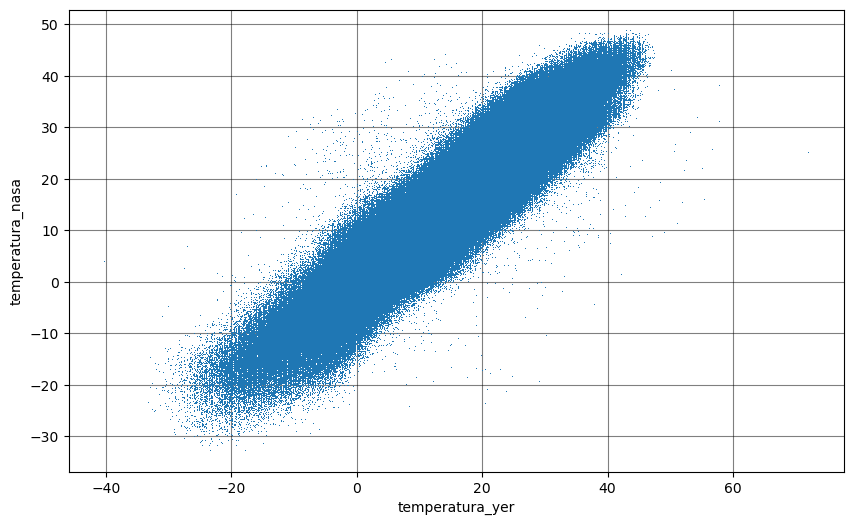

In [34]:
import matplotlib.pyplot as plt
x=temp_new['temp_yer']
y=temp_new1['temp_nasa']
plt.figure(figsize=(10,6))
# m, b = np.polyfit(x, y, 1)
plt.plot(x,y,",")
# plt.plot(x, m*x + b, color='red')
plt.ylabel("temperatura_nasa")
plt.xlabel("temperatura_yer")
plt.grid(color='black',alpha=0.5,linestyle='-')
plt.show()

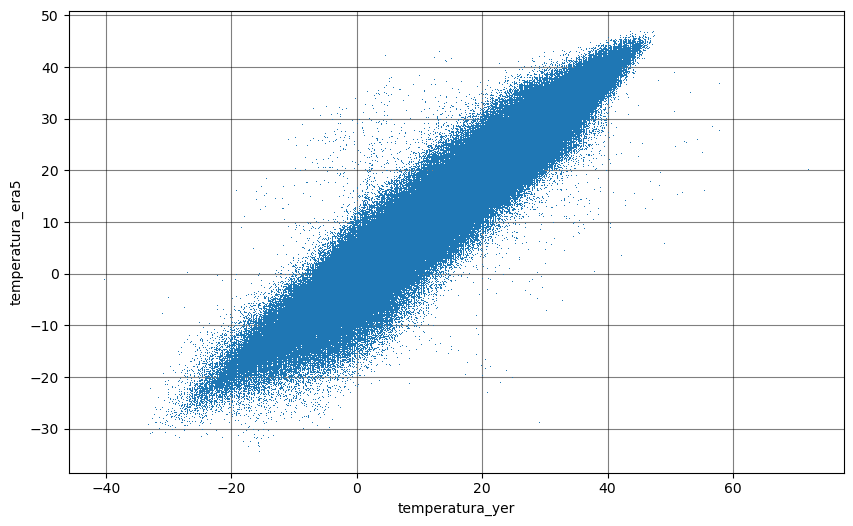

In [70]:
import matplotlib.pyplot as plt
x=temp_new2['temp_yer']
y=temp_new2['temp_era5']
plt.figure(figsize=(10,6))
# m, b = np.polyfit(x, y, 1)
plt.plot(x,y,",")
# plt.plot(x, m*x + b, color='red')
plt.ylabel("temperatura_era5")
plt.xlabel("temperatura_yer")
plt.grid(color='black',alpha=0.5,linestyle='-')
plt.show()

In [19]:
import pandas as pd
import os
root_folder = 'd:/Dagbit/'
save_path = "d:/Dagbit/Dagbit2/"
for subdir, dirs, files in os.walk(root_folder):
     
    print(subdir)
    for file in files:
        print(file)
        if file.startswith('Uz-Dag'):
#             if file.endswith('0.xlsx'):
            id=file[:18]
            print(subdir)
            excel_file = os.path.join(subdir, file)
            print(excel_file)
            df = pd.read_excel(excel_file,sheet_name = 1)
            data=df.copy()
            data = data.drop(df.index[:18], axis=0)
            data = data.drop(df.columns[0], axis=1)
            data = data.drop(df.columns[-1], axis=1)
            data.to_excel(save_path +str(id)+".xlsx", header=False)

d:/Dagbit/
Uz-Dag_2013-03-26.xlsx
d:/Dagbit/
d:/Dagbit/Uz-Dag_2013-03-26.xlsx
Uz-Dag_2013-03-27.xlsx
d:/Dagbit/
d:/Dagbit/Uz-Dag_2013-03-27.xlsx
Uz-Dag_2013-03-28.xlsx
d:/Dagbit/
d:/Dagbit/Uz-Dag_2013-03-28.xlsx
Uz-Dag_2013-03-29.xlsx
d:/Dagbit/
d:/Dagbit/Uz-Dag_2013-03-29.xlsx
Uz-Dag_2013-03-30.xlsx
d:/Dagbit/
d:/Dagbit/Uz-Dag_2013-03-30.xlsx
Uz-Dag_2013-03-31.xlsx
d:/Dagbit/
d:/Dagbit/Uz-Dag_2013-03-31.xlsx
Uz-Dag_2013-04-01.xlsx
d:/Dagbit/
d:/Dagbit/Uz-Dag_2013-04-01.xlsx
Uz-Dag_2013-04-02.xlsx
d:/Dagbit/
d:/Dagbit/Uz-Dag_2013-04-02.xlsx
Uz-Dag_2013-04-03.xlsx
d:/Dagbit/
d:/Dagbit/Uz-Dag_2013-04-03.xlsx
Uz-Dag_2013-04-04.xlsx
d:/Dagbit/
d:/Dagbit/Uz-Dag_2013-04-04.xlsx
Uz-Dag_2013-04-05.xlsx
d:/Dagbit/
d:/Dagbit/Uz-Dag_2013-04-05.xlsx
Uz-Dag_2013-04-06.xlsx
d:/Dagbit/
d:/Dagbit/Uz-Dag_2013-04-06.xlsx
Uz-Dag_2013-04-07.xlsx
d:/Dagbit/
d:/Dagbit/Uz-Dag_2013-04-07.xlsx
Uz-Dag_2013-04-08.xlsx
d:/Dagbit/
d:/Dagbit/Uz-Dag_2013-04-08.xlsx
Uz-Dag_2013-04-09.xlsx
d:/Dagbit/
d:/Dagbit/Uz-Dag_

ValueError: Worksheet index 1 is invalid, 1 worksheets found